In [ ]:
import numpy as np

# Define parameters
K = 3  # Degree of polynomial
a, b = 0, 1  # Data range
sigma = 0.3  # Noise variance
N = 50  # Number of data points

# True parameters (for synthetic data generation)
theta_true = np.random.randn(K + 1)

# Generate data
X = np.random.uniform(a, b, N)
noise = np.random.normal(0, sigma, N)
Y = np.polyval(theta_true[::-1], X) + noise


In [ ]:
def polynomial_regression(X, Y, degree, lambda_reg=0):
    X_design = np.vander(X, N=degree+1, increasing=True)
    regularization = lambda_reg * np.eye(X_design.shape[1])
    theta = np.linalg.inv(X_design.T @ X_design + regularization) @ X_design.T @ Y
    return theta

theta_mle = polynomial_regression(X, Y, K)
theta_map = polynomial_regression(X, Y, K, lambda_reg=1.0)  # Example lambda


In [ ]:
def compute_error(X, Y, theta):
    Y_pred = np.polyval(theta[::-1], X)
    return np.mean(np.abs(Y - Y_pred))

error_mle = compute_error(X, Y, theta_mle)
error_map = compute_error(X, Y, theta_map)


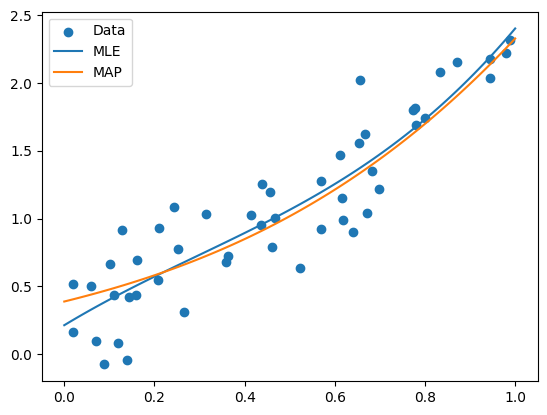

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Data')
X_line = np.linspace(a, b, 100)
plt.plot(X_line, np.polyval(theta_mle[::-1], X_line), label='MLE')
plt.plot(X_line, np.polyva  l(theta_map[::-1], X_line), label='MAP')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def generate_data(N= 100, a= 0, b= 1, true_coeffs= [1, -1, 0.5], noise_variance= 0.1):
    X = np.linspace(a, b, N)
    # Y = true_coeffs @ [x**i, x**(i-1), ..., 1] + e (which has normal dist)
    Y = np.polyval(true_coeffs[::-1], X) + np.random.normal(0, noise_variance, X.shape)
    #print(true_coeffs[::-1])
    print(X.shape)
    print(Y.shape)
    return X, Y

N = 100  # Number of data points
a, b = 0, 1  # Range of X
true_coeffs = [1, -1, 0.5]  # True coefficients for polynomial
noise_variance = 0.1  # Noise variance

X, Y = generate_data(N, a, b, true_coeffs, noise_variance)


(100,)
(100,)


In [ ]:
def polynomial_regression(X, Y, degree, lambda_reg=0):
    #x_desing is vandermont matrix respect to x [x**i, x**(i-1), ..., 1]
    X_design = np.vander(X, N=degree+1, increasing=True)
    print(X_design.shape)
    # np.eye gives identity matrix; so regularization = lambda_reg * I
    regularization = lambda_reg * np.eye(X_design.shape[1])
    theta = np.linalg.inv(X_design.T @ X_design + regularization) @ X_design.T @ Y
    return theta

degree = 2
theta_mle = polynomial_regression(X, Y, degree)
theta_map = polynomial_regression(X, Y, degree, lambda_reg=1.0)


(100, 3)
(100, 3)


In [ ]:
print(theta_mle, theta_map)

[ 0.97064637 -0.89775623  0.39940933] [ 0.8342063  -0.29028349 -0.12485792]


In [ ]:
def mean_squared_error(X, Y, theta):
    Y_pred = np.polyval(theta[::-1], X)
    return np.mean((Y - Y_pred)**2)

mse_mle = mean_squared_error(X, Y, theta_mle)
mse_map = mean_squared_error(X, Y, theta_map)
print(mse_mle)
print(mse_map)


0.010308106692900403
0.01255510224503712


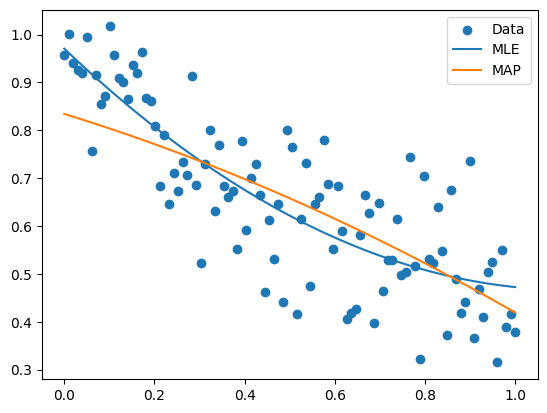

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Data')
X_line = np.linspace(a, b, 100)
plt.plot(X_line, np.polyval(theta_mle[::-1], X_line), label='MLE')
plt.plot(X_line, np.polyval(theta_map[::-1], X_line), label='MAP')
plt.legend()
plt.show()


(100, 6)


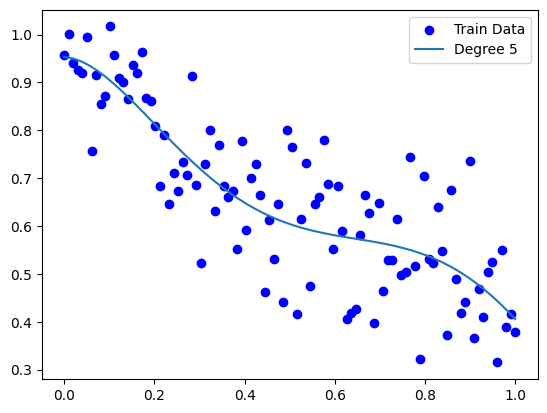

In [ ]:

def plot_regression(X_train, Y_train, X_test, Y_test, K):
    thetas = []
    for i in K:
      thetas.append(polynomial_regression(X_train, Y_train, i))
    theta = polynomial_regression(X_train, Y_train, K)
    theta1 = polynomial_regression(X_train, Y_train, K+1)
    plt.scatter(X_train, Y_train, color='blue', label='Train Data')
    plt.scatter(X_test, Y_test, color='red', label='Test Data')

    X_line = np.linspace(a, b, 100)
    plt.plot(X_line, np.polyval(theta[::-1], X_line), label=f'Degree {K}')
    plt.plot(X_line, np.polyval(theta1[::-1], X_line), label=f'Degree {K+1}')
    plt.legend()
    plt.show()

plot_regression(X, Y, X, Y, 5)

In [ ]:
#new wooooork

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Task 1
# Define parameters for synthetic data
a, b = 0, 1
N = 200
true_coeffs = [1, 1, 1]
noise_variance = 0.3

# Function to generate synthetic data
#Q1,2
def generate_data(N, a, b, true_coeffs, noise_variance):
    X = np.linspace(a, b, N)
    Y = np.polyval(true_coeffs[::-1], X) + np.random.normal(0, noise_variance, X.shape)
    return X, Y

# Polynomial regression using Normal Equation
def normal_equation_regression(X, Y, degree, lambda_reg=0):
    X_design = PolynomialFeatures(degree=degree, include_bias=True).fit_transform(X.reshape(-1, 1))
    reg_matrix = lambda_reg * np.eye(X_design.shape[1])
    theta = np.linalg.inv(X_design.T @ X_design + reg_matrix) @ X_design.T @ Y
    return theta

# Function to compare results for varying N
def compare_results_for_varying_N(true_coeffs, noise_variance, degree, N_values):
    for N in N_values:
        # Generate synthetic data
        X, Y = generate_data(N, a, b, true_coeffs, noise_variance)

        # Split data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        # Polynomial regression using Normal Equation
        theta_normal = normal_equation_regression(X_train, Y_train, degree)

        # Evaluate performance on test set
        X_test_design = PolynomialFeatures(degree=degree, include_bias=True).fit_transform(X_test.reshape(-1, 1))
        error_normal = mean_absolute_error(X_test_design @ theta_normal, Y_test)

        print(f"Number of Datapoints (N): {N}")
        print(f"Normal Equation Test Error: {error_normal}\n")

# Compare results for different number of datapoints
# bulet 9 
N_values = [50, 100, 200, 500]  # Varying number of datapoints
compare_results_for_varying_N(true_coeffs, noise_variance, degree, N_values)
X, Y = generate_data(N, a, b, true_coeffs, noise_variance)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Number of Datapoints (N): 50
Normal Equation Test Error: 0.44974840663912374

Number of Datapoints (N): 100
Normal Equation Test Error: 0.19230442100845707

Number of Datapoints (N): 200
Normal Equation Test Error: 0.24673086431604943

Number of Datapoints (N): 500
Normal Equation Test Error: 0.1937743246968952



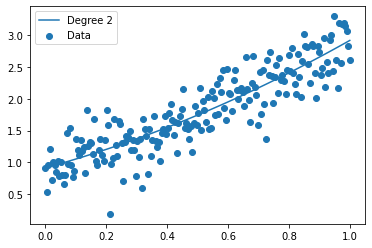

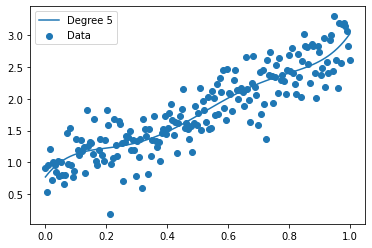

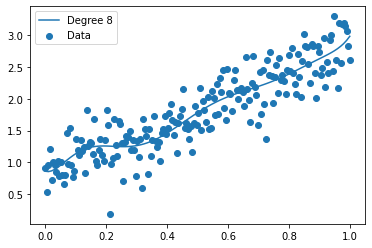

In [11]:
# Task 2
# MLE solution function
def mle_solution(X, Y, degree):
    X_design = np.vander(X, N=degree+1, increasing=True)
    theta_mle = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y
    return theta_mle

# Average absolute error function
def average_absolute_error(theta, X_test, Y_test):
    X_test_design = np.vander(X_test, N=len(theta), increasing=True)
    predictions = X_test_design @ theta
    error = np.mean(np.abs(predictions - Y_test))
    return error

# For different values of K, plot the training and test datapoints with the learnt regression model fMLE (x)
#bullet 3
degrees_to_try = [2, 5, 8]

for degree in degrees_to_try:
    # MLE solution
    theta_mle = mle_solution(X, Y, degree)

    # Visualization
    plt.scatter(X, Y, label='Data')
    X_line = np.linspace(a, b, 100)
    Y_line = np.polyval(theta_mle[::-1], X_line)
    plt.plot(X_line, Y_line, label=f'Degree {degree}')
    plt.legend()
    plt.show()

#####  If the model is too complex (high K), it may fit the training data very well but fail to generalize to new, unseen data. On the other hand, if the model is too simple (low K), it may not capture the underlying patterns in the data. 
##### that's why, the MAP approach is recommended when there is uncertainty about the appropriate model complexity, as it leverages prior information to guide the parameter estimation in a more stable way than MLE alone.

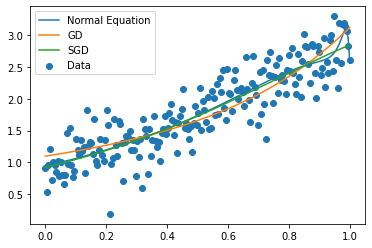

In [12]:
# Task 3
# bulet 1, 10
# Normal Equation, Gradient Descent, and Stochastic Gradient Descent
def normal_equation(X, Y, lambda_reg=0):
    X_design = np.vander(X, N=len(X), increasing=True)
    reg_matrix = lambda_reg * np.eye(X_design.shape[1])
    theta = np.linalg.inv(X_design.T @ X_design + reg_matrix) @ X_design.T @ Y
    return theta

def gradient_descent(X, Y, degree, alpha=0.01, epochs=1000, lambda_reg=0):
    X_design = np.vander(X, N=degree+1, increasing=True)
    theta = np.zeros(X_design.shape[1])
    reg_term = lambda_reg * theta

    for epoch in range(epochs):
        predictions = X_design @ theta
        errors = predictions - Y
        gradient = X_design.T @ errors / len(X)
        theta = theta - alpha * (gradient + reg_term)

    return theta

def stochastic_gradient_descent(X, Y, degree, alpha=0.01, epochs=1000, lambda_reg=0):
    X_design = np.vander(X, N=degree+1, increasing=True)
    theta = np.zeros(X_design.shape[1])
    reg_term = lambda_reg * theta

    for epoch in range(epochs):
        indices = np.random.permutation(len(X))
        X_shuffled, Y_shuffled = X_design[indices], Y[indices]

        for i in range(len(X)):
            prediction = X_shuffled[i] @ theta
            error = prediction - Y_shuffled[i]
            gradient = X_shuffled[i] * error
            theta = theta - alpha * (gradient + reg_term)

    return theta

# testing:
degree = 5
lambda_reg = 0.1
theta_normal = normal_equation(X, Y, lambda_reg)
theta_gd = gradient_descent(X, Y, degree, lambda_reg=lambda_reg)
theta_sgd = stochastic_gradient_descent(X, Y, degree, lambda_reg=lambda_reg)
plt.scatter(X, Y, label='Data')
plt.plot(X, np.polyval(theta_normal[::-1], X), label='Normal Equation')
plt.plot(X, np.polyval(theta_gd[::-1], X), label='GD')
plt.plot(X, np.polyval(theta_sgd[::-1], X), label='SGD')
plt.legend()
plt.show()



In [13]:
# Task 4
# Compare MLE, GD, and SGD errors on the test set
print("Test Errors:")
print(f"Normal Equation: {average_absolute_error(theta_normal, X_test, Y_test)}")
print(f"Gradient Descent: {average_absolute_error(theta_gd, X_test, Y_test)}")
print(f"Stochastic Gradient Descent: {average_absolute_error(theta_sgd, X_test, Y_test)}")


Test Errors:
Normal Equation: 0.20976093741054677
Gradient Descent: 0.23161781863964387
Stochastic Gradient Descent: 0.21320466735248575


#### obviously the result for Normal equation is much more precise than gd and sgd, although the result for sgd is acceptable

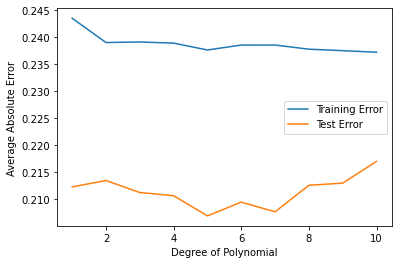

In [14]:
# Task 5
# bullet 4 , 2
# Plot training and test errors for different degrees
def plot_errors(X_train, Y_train, X_test, Y_test, max_degree):
    training_errors = []
    test_errors = []
    degrees = list(range(1, max_degree + 1))

    for degree in degrees:
        theta_mle = mle_solution(X_train, Y_train, degree)
        training_errors.append(average_absolute_error(theta_mle, X_train, Y_train))
        test_errors.append(average_absolute_error(theta_mle, X_test, Y_test))

    plt.plot(degrees, training_errors, label='Training Error')
    plt.plot(degrees, test_errors, label='Test Error')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Average Absolute Error')
    plt.legend()
    plt.show()

# have X_test and Y_test for your test set
plot_errors(X_train, Y_train, X_test, Y_test, max_degree=10)



##### everything is what we expected. cause, in training data if use more complex model, the error will decrese because model just try to overfit every single datapoint. however, when you increase the degree overfitting happend and in test data the error will increase for sure because model lost the capability to estimate the pattern

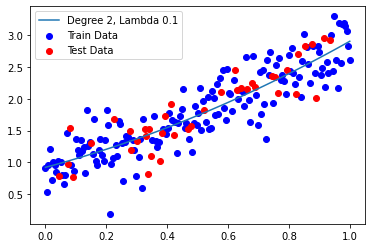

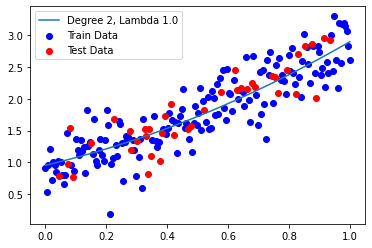

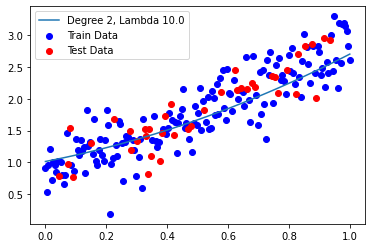

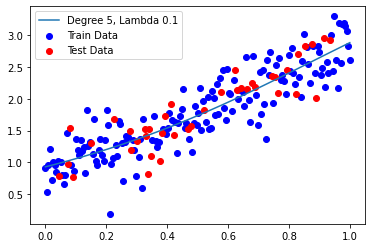

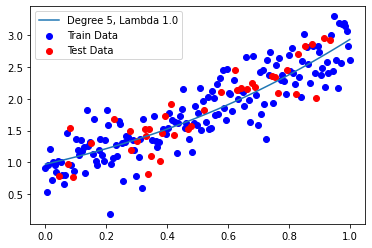

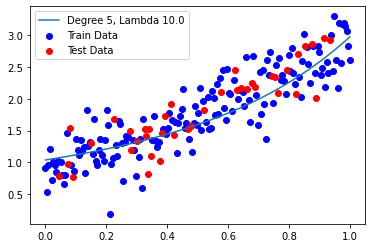

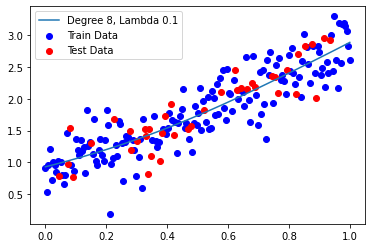

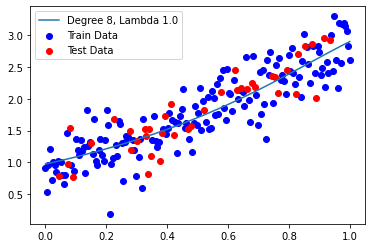

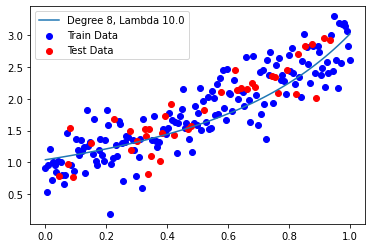

In [15]:
# Task 6
# bulet 5
# MAP Solution function
def map_solution(X, Y, degree, lambda_reg):
    X_design = np.vander(X, N=degree+1, increasing=True)
    regularization = lambda_reg * np.eye(X_design.shape[1])
    theta_map = np.linalg.inv(X_design.T @ X_design + regularization) @ X_design.T @ Y
    return theta_map

# bulet 6
# Plot regression models for different degrees and lambda values
def plot_map_regression(X_train, Y_train, X_test, Y_test, degrees, lambda_reg_values):
    for degree in degrees:
        for lambda_reg in lambda_reg_values:
            theta_map = map_solution(X_train, Y_train, degree, lambda_reg)
            plt.scatter(X_train, Y_train, color='blue', label='Train Data')
            plt.scatter(X_test, Y_test, color='red', label='Test Data')
            X_line = np.linspace(a, b, 100)
            Y_line = np.polyval(theta_map[::-1], X_line)
            plt.plot(X_line, Y_line, label=f'Degree {degree}, Lambda {lambda_reg}')
            plt.legend()
            plt.show()

# Assume you have X_test and Y_test for your test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
plot_map_regression(X_train, Y_train, X_test, Y_test, degrees=[2, 5, 8], lambda_reg_values=[0.1, 1.0, 10.0])



##### as we see lambda is a good regularization term to control overfitting the MAP estimation if correclty tested multyple times. so basically there are times that degree is not suitable though with appropriate lambda we could get acceptable result relativly

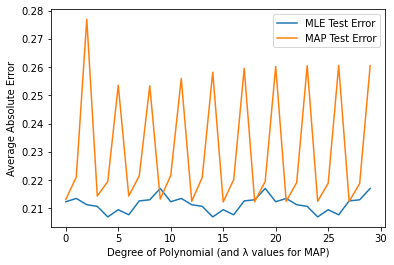

In [16]:
# Task 7
# bulet 7
# Compare MLE and MAP errors for different degrees and lambda values
def compare_mle_map_errors(X_train, Y_train, X_test, Y_test, max_degree, lambda_reg_values):
    degrees = list(range(1, max_degree + 1))
    mle_errors = []
    map_errors = []

    for degree in degrees:
        theta_mle = mle_solution(X_train, Y_train, degree)
        mle_errors.append(average_absolute_error(theta_mle, X_test, Y_test))

        for lambda_reg in lambda_reg_values:
            theta_map = map_solution(X_train, Y_train, degree, lambda_reg)
            map_errors.append(average_absolute_error(theta_map, X_test, Y_test))

    mle_errors = np.tile(mle_errors, len(lambda_reg_values))  # Replicate mle_errors for each lambda
    plt.plot(range(len(mle_errors)), mle_errors, label='MLE Test Error')
    plt.plot(range(len(map_errors)), map_errors, label='MAP Test Error')
    plt.xlabel('Degree of Polynomial (and λ values for MAP)')
    plt.ylabel('Average Absolute Error')
    plt.legend()
    plt.show()

# Assume you have X_test and Y_test for your test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
compare_mle_map_errors(X_train, Y_train, X_test, Y_test, max_degree=10, lambda_reg_values=[0.1, 1.0, 10.0])


##### as we see lambda is a good regularization term to control overfitting the MAP estimation if correclty tested multyple times. so basically there are times that degree is not suitable though with appropriate lambda we could get acceptable result relativly

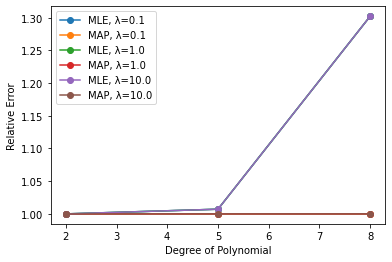

In [18]:
# Task 8
# bulet 8
# Relative error function
def compute_relative_error(theta_true, theta):
    padded_true_theta = np.zeros(len(theta))
    padded_true_theta[:len(theta_true)] = theta_true[:len(theta)]
    return np.linalg.norm(theta - padded_true_theta) / np.linalg.norm(padded_true_theta)

# Plot relative errors for different degrees and lambda values
def plot_relative_errors(X_train, Y_train, X_test, Y_test, degrees, lambda_reg_values):
    true_degree = max(degrees)
    theta_true = np.polyfit(X_train, Y_train, true_degree)

    for lambda_reg in lambda_reg_values:
        relative_errors_mle = []
        relative_errors_map = []

        for degree in degrees:
            theta_mle = mle_solution(X_train, Y_train, degree)
            relative_error_mle = compute_relative_error(theta_true, theta_mle)
            relative_errors_mle.append(relative_error_mle)

            theta_map = map_solution(X_train, Y_train, degree, lambda_reg)
            relative_error_map = compute_relative_error(theta_true, theta_map)
            relative_errors_map.append(relative_error_map)

        plt.plot(degrees, relative_errors_mle, marker='o', label=f'MLE, λ={lambda_reg}')
        plt.plot(degrees, relative_errors_map, marker='o', label=f'MAP, λ={lambda_reg}')

    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.show()

# Assume you have X_test and Y_test for your test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
plot_relative_errors(X_train, Y_train, X_test, Y_test, degrees=[2, 5, 8], lambda_reg_values=[0.1, 1.0, 10.0])

##### as we see lambda is a good regularization term to control overfitting the MAP estimation if correclty tested multyple times 